In [2]:
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

from mlxtend.plotting import plot_confusion_matrix

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import random
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Load the CSV file
df = pd.read_csv('fashion-mnist_test.csv')

# Assuming the first column is the label (y) and the rest are pixel values (x)
y = df.iloc[:, 0].values  # Labels (digits 0-9)
x = df.iloc[:, 1:].values  # Pixel values (28x28 flattened)


In [12]:
# Reshape the data to (num_samples, 28, 28, 1) for model input
x = x.reshape(x.shape[0], 28, 28, 1)

# One-hot encode the labels
y_cat = tf.keras.utils.to_categorical(y, 10)


In [13]:
# Convert to float32 and normalize the pixel values
x = x.astype('float32') / 255.0


In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


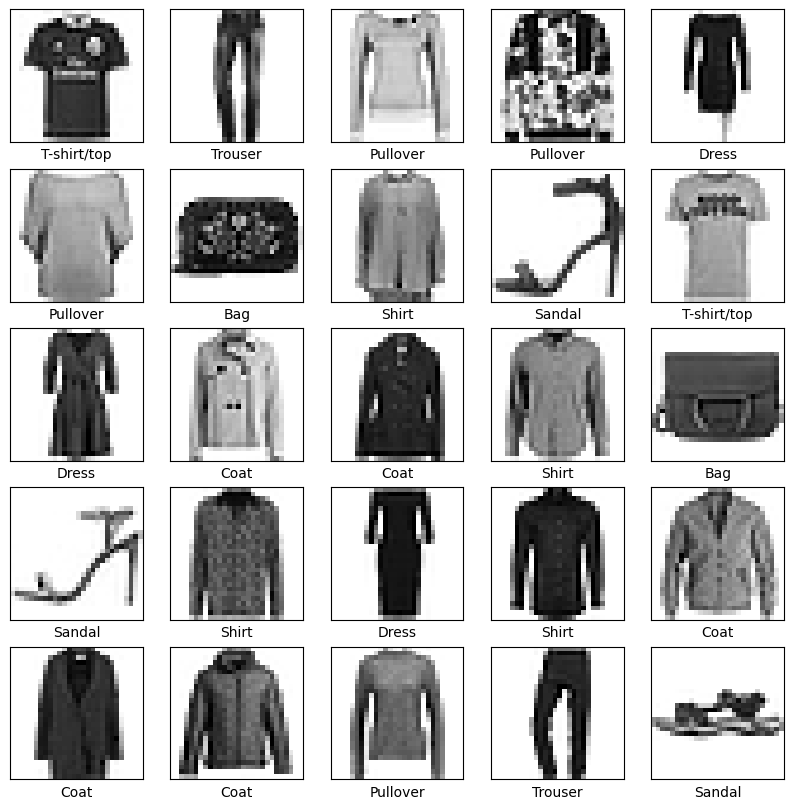

In [15]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i], cmap=plt.cm.binary)  # Using 'x' since we renamed it from x_train
    plt.xlabel(class_names[np.argmax(y_cat[i])])  # Using 'y_cat' since we renamed it from y_train
plt.show()


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    tf.keras.layers.Dense(len(class_names), activation='softmax', name='output-layer')
])

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [18]:
history = model.fit(x, y_cat, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1796 - loss: 2.1815 - val_accuracy: 0.4350 - val_loss: 1.6391
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4766 - loss: 1.5221 - val_accuracy: 0.5290 - val_loss: 1.3273
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5490 - loss: 1.2606 - val_accuracy: 0.5840 - val_loss: 1.1662
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5943 - loss: 1.1460 - val_accuracy: 0.6015 - val_loss: 1.0956
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6103 - loss: 1.0721 - val_accuracy: 0.6095 - val_loss: 1.0377
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6257 - loss: 1.0308 - val_accuracy: 0.6390 - val_loss: 0.9746
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6441 - loss: 0.9959 - val_accuracy: 0.6835 - val_loss: 0.9167
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6681 - loss: 0.9402 - val_accu

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv-layer-1 (Conv2D)                │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling-layer-1 (AveragePooling2D)   │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv-layer-2 (Conv2D)                │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling-layer-2 (AveragePooling2D)   │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling-layer-3                      │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,304 (227.75 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,870 (151.84 KB)

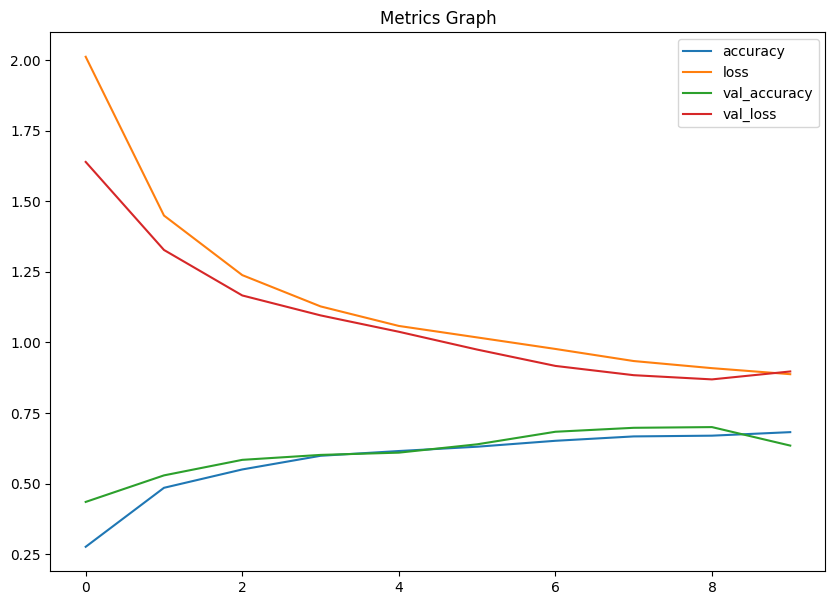

In [20]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.title("Metrics Graph")
plt.show()

In [21]:
model.evaluate(x, y_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6348 - loss: 0.9063


[0.903884768486023, 0.6373000144958496]

In [24]:
predictions = model.predict(x)
predictions = tf.argmax(predictions, axis=1)
new_y = tf.argmax(y_cat, axis=1)
new_y = tf.Variable(new_y)
print(metrics.accuracy_score(new_y, predictions))
print(metrics.classification_report(y, predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.6373
              precision    recall  f1-score   support

           0       0.61      0.22      0.32      1000
           1       0.91      0.95      0.93      1000
           2       0.60      0.52      0.56      1000
           3       0.63      0.83      0.71      1000
           4       0.65      0.02      0.04      1000
           5       0.75      0.93      0.83      1000
           6       0.28      0.70      0.40      1000
           7       0.77      0.75      0.76      1000
           8       0.89      0.72      0.80      1000
           9       0.90      0.72      0.80      1000

    accuracy                           0.64     10000
   macro avg       0.70      0.64      0.61     10000
weighted avg       0.70      0.64      0.61     10000



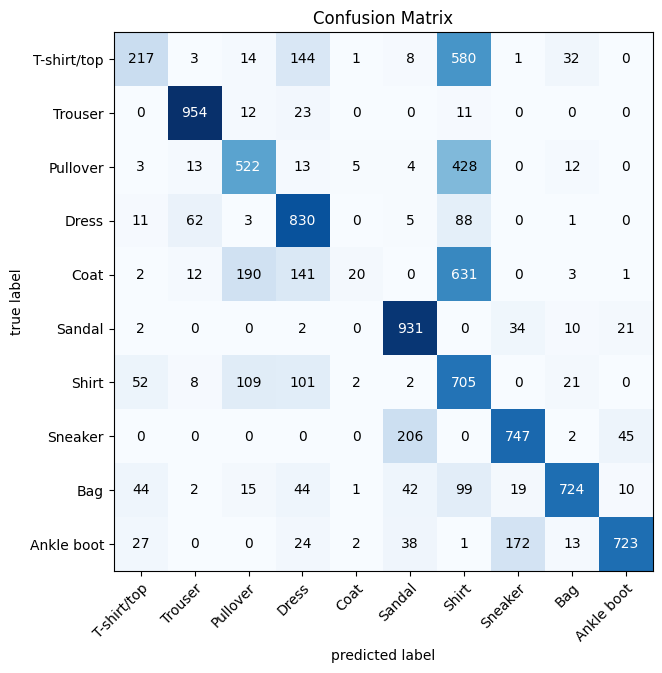

In [25]:
cm = metrics.confusion_matrix(new_y, predictions)
plot_confusion_matrix(cm, figsize=(10, 7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


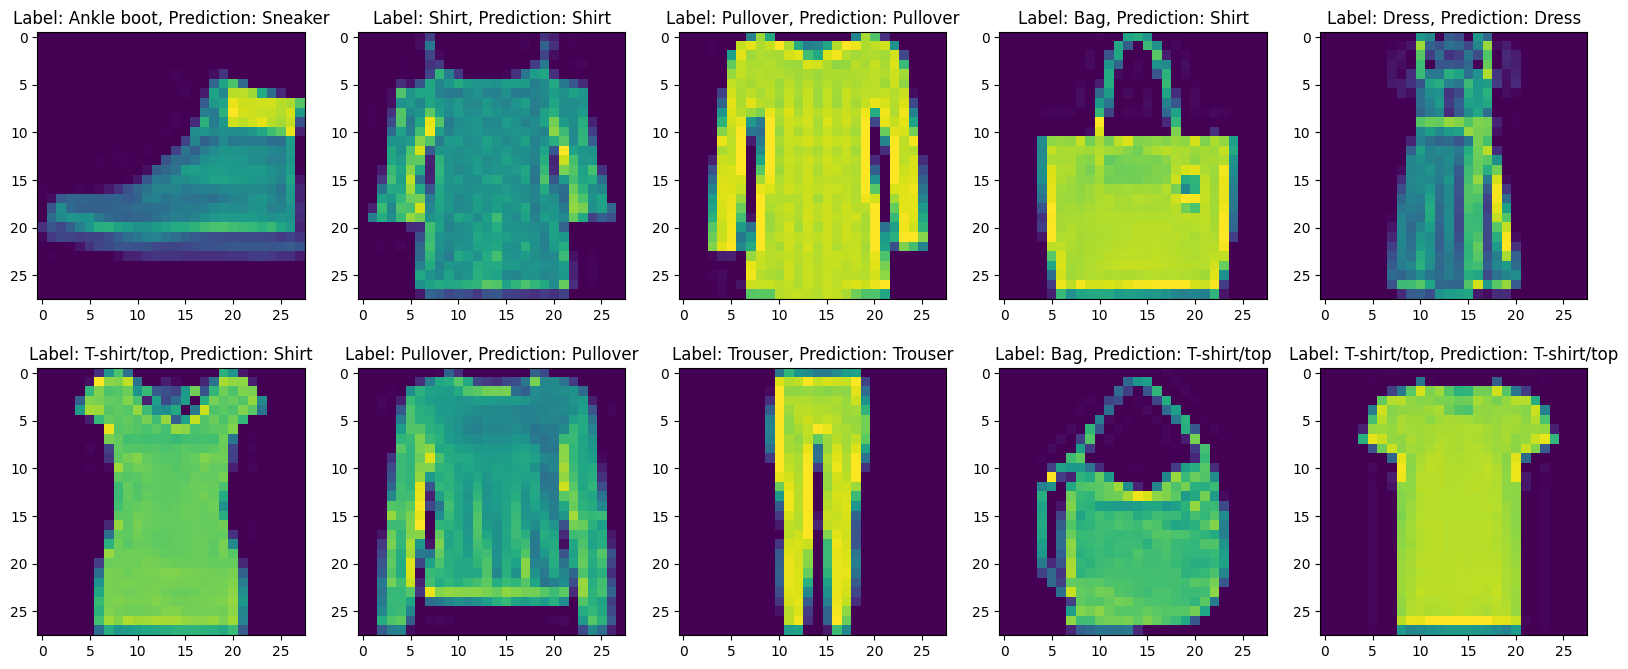

In [26]:
images = []
labels = []
random_indices = random.sample(range(len(x)), 10)  # using 'x' and 'y_cat'
for idx in random_indices:
    images.append(x[idx])
    labels.append(y_cat[idx])
images = np.array(images)
labels = np.array(labels)

fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x_pos = 1  # avoid overwriting variable 'x'

for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x_pos)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label_name = class_names[tf.argmax(label)]
    plt.title(f"Label: {label_name}, Prediction: {prediction}")
    plt.imshow(image / 255.0)
    x_pos += 1
